In [1]:
import pandas as pd
import numpy as np
import time
import os
import collections
from XFLib import *
# class time_est():
#     def __init__(self, total_len):
#         self.t_start = time.time()
#         self.total_len = total_len
#         self.count = 0
#         self.t_ref = time.time()
    
#     def check(self,no_of_check=1,info=""):
#         self.count += no_of_check
#         if time.time() - self.t_ref > 1:
#             t_used = time.time() - self.t_start
#             t_total = t_used * self.total_len / self.count
#             t_remain = t_total - t_used
#             process_bar = "|"
#             for i in range(40):
#                 if (i/40) < (self.count/self.total_len):
#                     process_bar += "█"
#                 else:
#                     process_bar += " "
#             process_bar += "|"
#             print("\r" + (str(info) + "  {:.2f}% ({}/{})\t".format(self.count * 100/self.total_len, self.count,self.total_len)) + str(process_bar).ljust(45) + "Used: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(16) + "ETA: {:02.0f}:{:02.0f}:{:02.0f}".format(int(t_remain/3600), int(t_remain/60)%60, t_remain % 60),end="")
#             self.t_ref = time.time()
#         if self.count == self.total_len:
#             t_used = time.time() - self.t_start
#             print("\r" + str(info) + "  Finished in " +"{:02.0f}:{:02.0f}:{:02.0f}".format(int(t_used/3600), int(t_used/60)%60, t_used % 60).ljust(100))

In [2]:
def clean_duplicate(artist_info):
    est = time_est(len(artist_info))
    cleaned_artist = []
    for user in range(len(artist_info)):
        user_sequence = artist_info[user]
        last = 0
        this_sequence = []
        for i in range(len(user_sequence)):
            this = user_sequence[i]
            if this != last:
                this_sequence.append(this)
            last = this
        cleaned_artist.append(this_sequence)
        est.check()
    return cleaned_artist

In [3]:
path = 'i2v_sep/'
file = os.listdir(path)

In [4]:
top_artist = np.load('eval/artist.npy')

In [5]:
def get_MC(data_dict):
    est = time_est(len(data_dict))
    MC = collections.defaultdict()
    for i in range(len(data_dict)):
        last_item = 0
        for item in data_dict[i]:
            if last_item !=0:
                try:
                    MC[last_item][item] +=1
                except:
                    MC[last_item] = collections.defaultdict(lambda:0)
                    MC[last_item][item] +=1
            last_item = item
        est.check()
    return MC

In [6]:
customer_id_dict = np.load('eval/i2v_cus.npy').item()
artist_info = list(customer_id_dict.values())

In [7]:
artist_info = clean_duplicate(artist_info)

Finished in 00:00:29                                                                                            


In [8]:
predict_dict = get_MC(artist_info)

Finished in 00:00:28                                                                                            


In [9]:
import operator
recommand_list = []
recommand_dict = dict(sorted(predict_dict["Echosmith"].items(), key=operator.itemgetter(1), reverse=True)[:10])
for i in recommand_dict:
    recommand_list.append([recommand_dict[i],i])

list(reversed(sorted(recommand_list)))

[[432312, 'Ed Sheeran'],
 [153923, 'Clean Bandit'],
 [144907, 'David Guetta'],
 [103291, 'Coldplay'],
 [96495, 'Blonde'],
 [95211, 'Nico & Vinz'],
 [90218, 'Vance Joy'],
 [83557, 'LILLYWOOD & Robin Schulz'],
 [65787, 'Oliver Heldens'],
 [32143, 'Charli XCX']]

In [11]:
# genres["Linkin Park"]

In [12]:
genres = np.load('eval/top100artistgenres.npy').item()

In [13]:
import operator
ip = "Linkin Park"
recommand_list = []
recommand_dict = dict(sorted(predict_dict[ip].items(), key=operator.itemgetter(1), reverse=True)[:10])
for i in recommand_dict:
    recommand_list.append([recommand_dict[i],i])
related = list(reversed(sorted(recommand_list)))
related = [x[1] for x in related]
related = [x for x in related if x != ip]

In [14]:
related

['Ed Sheeran',
 'Green Day',
 'Nickelback',
 'Red Hot Chili Peppers',
 'Slipknot',
 'Coldplay',
 'David Guetta',
 'Paramore',
 'My Chemical Romance',
 'Muse']

In [15]:
ip_gen = genres[ip]

count = 0
for j in related:
    for i in genres[j]:
        if i in ip_gen:
            count+=1
            break
print(count/10)

0.8


In [16]:
top_artist = np.load('eval/artist.npy')

In [17]:
score_list = []


for num_pred in range(1,100):
    count = 0
    for i in top_artist:
        ip = i
        recommand_list = []
        recommand_dict = dict(sorted(predict_dict[ip].items(), key=operator.itemgetter(1), reverse=True)[:num_pred])
        for i in recommand_dict:
            recommand_list.append([recommand_dict[i],i])
        related = list(reversed(sorted(recommand_list)))
        related = [x[1] for x in related]
        related = [x for x in related if x != ip]
        ip_gen = genres[ip]
    #     count = 0
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))

In [18]:
np.save('eval/mc_eval.npy',score_list)

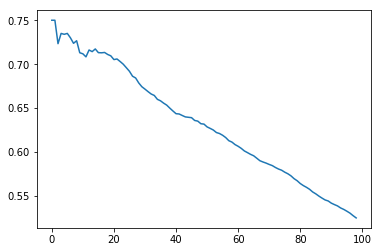

In [19]:
import matplotlib.pyplot as plt

plt.plot(score_list)
plt.show()

In [20]:
matrix_eval = np.load('matrix_eval.npy').item()

In [21]:
count = 0
for i in top_artist:
    ip = i
    recommand_list = []
    recommand_dict = dict(sorted(predict_dict[i].items(), key=operator.itemgetter(1), reverse=True)[:10])
    for i in recommand_dict:
        recommand_list.append([recommand_dict[i],i])
    related = list(reversed(sorted(recommand_list)))
    related = [x[1] for x in related]
    related = [x for x in related if x != ip]
    ip_gen = genres[i]
#     count = 0
    for j in related:
        if j in matrix_eval[i][:10]:
            count+=1
print(count/1000)

0.086


In [23]:
score_list = []


for num_pred in range(1,100):
    count = 0
    for i in top_artist:
        ip = i
        recommand_list = []
        temp_dict = predict_dict[i].copy()
#         try:
#             del temp_dict[ip]
#         except Exception as e:
# #             print(e,1)
#             pass
        recommand_dict = dict(sorted(temp_dict.items(), key=operator.itemgetter(1), reverse=True)[:num_pred])
        for i in recommand_dict:
            recommand_list.append([recommand_dict[i],i])
        related = list(reversed(sorted(recommand_list)))
        related = [x[1] for x in related]
#         related = [x for x in related if x != ip]
        ip_gen = genres[i]
    #     count = 0
        correct = 0
        for j in related:
            if j in matrix_eval[ip][:num_pred]:
                correct = 1
        count += correct
    score_list.append(count/(100))

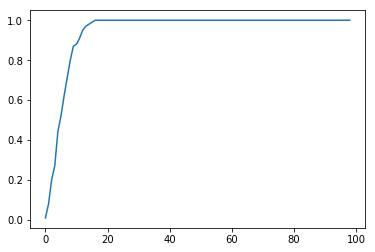

In [24]:
plt.plot(score_list)
plt.show()

In [25]:
np.save('eval/mc_acc.npy', score_list)

In [ ]:
matrix_eval[i][:3]

In [ ]:
recommand_list = []
recommand_dict = dict(sorted(temp_dict.items(), key=operator.itemgetter(1), reverse=True)[:3])
for i in recommand_dict:
    recommand_list.append([recommand_dict[i],i])
related = list(reversed(sorted(recommand_list)))
related = [x[1] for x in related]
related